**12/13/24**

The purpose of this notebook is to graph growth curves of bacteria to study formate utilization by the organism ELVB DNF00809.

In [2]:
from elliot_utils import *

In [3]:
analysisPath = Path.cwd().joinpath('analysis_files/dnf809_formate/')
figurePath = Path.cwd().joinpath('figures/dnf809_formate/')   

In [4]:
# Returns: A subset DataFrame of "df" with only data for the specified strains and treatments
# df: A DataFrame generated by the curveData2df function. It will have the headers 'Treatment', 'OD600', 'Hours'
# keys: A list of all the keys to select on
# values: A list of lists where values[n] is a list of all the values to include for keys[n]
# If time limit is set, will only return up to the given time point in hours (inclusive)
# If treatments is set to a list, will only return values for those treatments
def sliceDFBy(df, keys, values, timeLimit=1000000000000):
    dataDict = {}
    for key in df.keys():
        dataDict[key] = []
    for index, row in df.iterrows():
        include = True
        for k in keys:
            keyIndex = keys.index(k)
            if not row[k] in values[keyIndex]:
                include = False
        if include:
            for key in dataDict.keys():
                dataDict[key].append(row[key])
    return pd.DataFrame(dataDict)

# Returns: The dataDF appended with a new column representing the OD600 for the sample at the given time minus its starting OD600
# dataDF: Dataframe output by the curveData2df function
def calculateDeltaOD(dataDF):
    startingOD = None
    deltaODs = []
    for index, row in dataDF.iterrows():
        if row['Hours'] == 0:
            startingOD = row['OD600']
            deltaODs.append(0)
        else:
            deltaODs.append(row['OD600'] - startingOD)
    dataDF['Delta OD600'] = deltaODs

In [38]:
data121024 = pd.read_csv(analysisPath.joinpath('12-10-24_315A_dnf809_coculture.csv'))
strainLocs = [
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'ELVB DNF00809', 'ELVB DNF00809', 'ELVB DNF00809', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'Negative', '', ''],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'ELVB DNF00809', 'ELVB DNF00809', 'ELVB DNF00809', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'Negative', '', ''],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'ELVB DNF00809', 'ELVB DNF00809', 'ELVB DNF00809', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'Negative', '', ''],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'ELVB DNF00809', 'ELVB DNF00809', 'ELVB DNF00809', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'Negative', '', ''],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'ELVB DNF00809', 'ELVB DNF00809', 'ELVB DNF00809', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'Negative', '', ''],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'ELVB DNF00809', 'ELVB DNF00809', 'ELVB DNF00809', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'G. vaginalis + ELVB', 'Negative', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', ],
    ['', '', '', '', '', '', '', '', '', '', '', '', ]
]
treatmentLocs = [
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose'],
    ['KNO3', 'KNO3', 'KNO3', 'KNO3', 'KNO3', 'KNO3', 'KNO3', 'KNO3', 'KNO3', 'KNO3', 'KNO3', 'KNO3'],
    ['Glucose + KNO3', 'Glucose + KNO3', 'Glucose + KNO3', 'Glucose + KNO3', 'Glucose + KNO3', 'Glucose + KNO3', 'Glucose + KNO3', 'Glucose + KNO3', 'Glucose + KNO3', 'Glucose + KNO3', 'Glucose + KNO3', 'Glucose + KNO3'],
    ['Fumarate', 'Fumarate', 'Fumarate', 'Fumarate', 'Fumarate', 'Fumarate', 'Fumarate', 'Fumarate', 'Fumarate', 'Fumarate', 'Fumarate', 'Fumarate'],
    ['Glucose + Fumarate', 'Glucose + Fumarate', 'Glucose + Fumarate', 'Glucose + Fumarate', 'Glucose + Fumarate', 'Glucose + Fumarate', 'Glucose + Fumarate', 'Glucose + Fumarate', 'Glucose + Fumarate', 'Glucose + Fumarate', 'Glucose + Fumarate', 'Glucose + Fumarate'],
    ['Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle'],
    ['', '', '', '', '', '', '', '', '', '', '', '', ],
    ['', '', '', '', '', '', '', '', '', '', '', '', ]
]
df121024 = curveData2df(data121024, strainLocs, treatmentLocs)
labels = []
for index, row in df121024.iterrows():
    labels.append(row['Strain'] + ' ' + row['Treatment'])
df121024['Label'] = labels

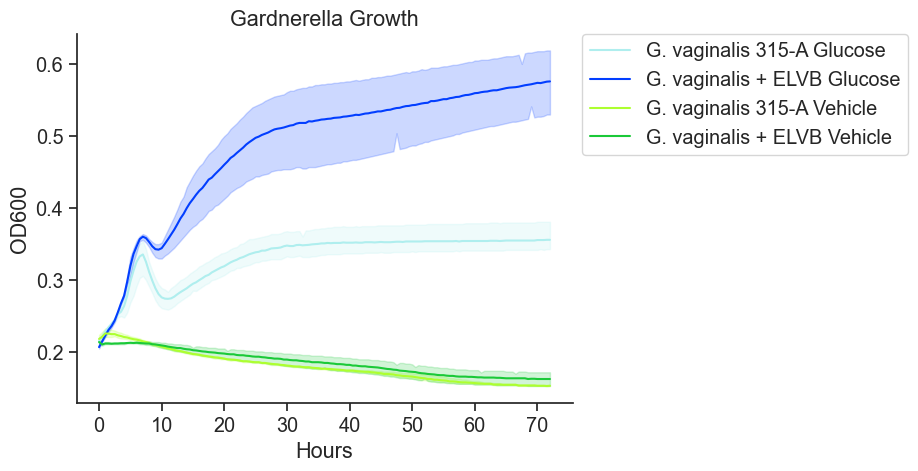

In [14]:
palette = ['paleturquoise', sns.color_palette('bright')[0], 'greenyellow', sns.color_palette('bright')[2]]
graphData = sliceDFBy(df121024, ['Strain', 'Treatment'], [['G. vaginalis 315-A', 'G. vaginalis + ELVB'], ['Glucose', 'Vehicle']])
plot = sns.lineplot(data=graphData, x='Hours', y='OD600', hue='Label', palette=palette)
plot.set(title='Gardnerella Growth')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()

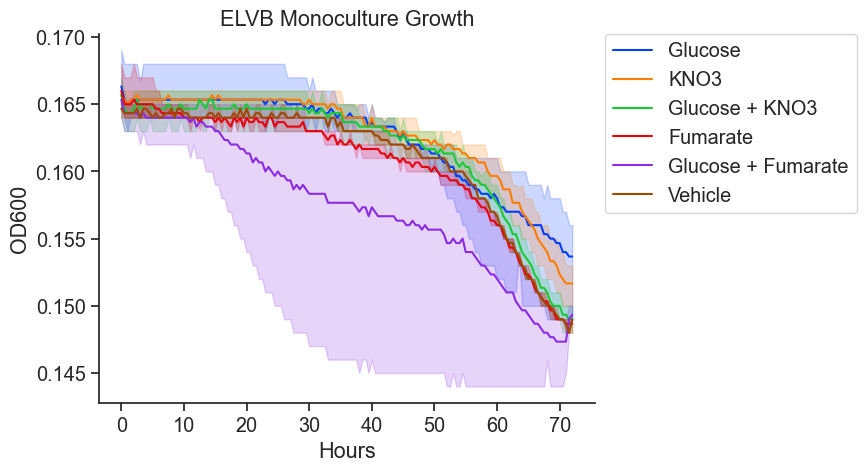

In [15]:
graphData = sliceDFBy(df121024, ['Strain', 'Treatment'], [['ELVB DNF00809'], ['Glucose', 'KNO3', 'Glucose + KNO3', 'Fumarate', 'Glucose + Fumarate', 'Vehicle']])
plot = sns.lineplot(data=graphData, x='Hours', y='OD600', hue='Treatment')
plot.set(title='ELVB Monoculture Growth')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()

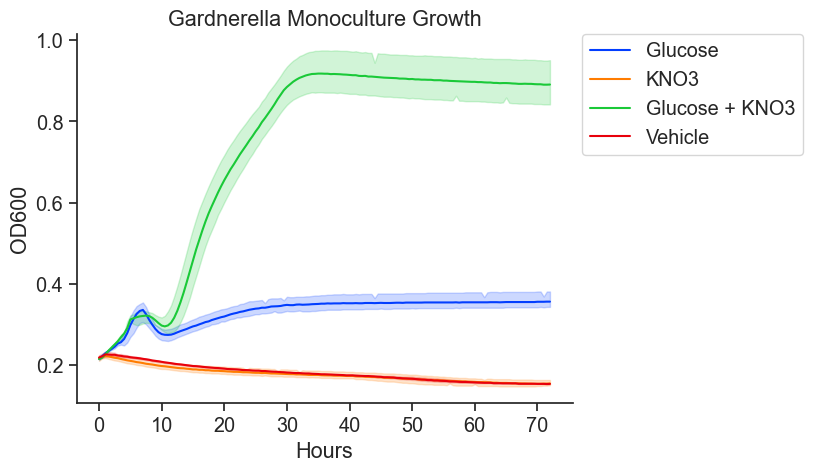

In [19]:
graphData = sliceDFBy(df121024, ['Strain', 'Treatment'], [['G. vaginalis 315-A'], ['Glucose', 'KNO3', 'Glucose + KNO3', 'Vehicle']])
plot = sns.lineplot(data=graphData, x='Hours', y='OD600', hue='Treatment')
plot.set(title='Gardnerella Monoculture Growth')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()

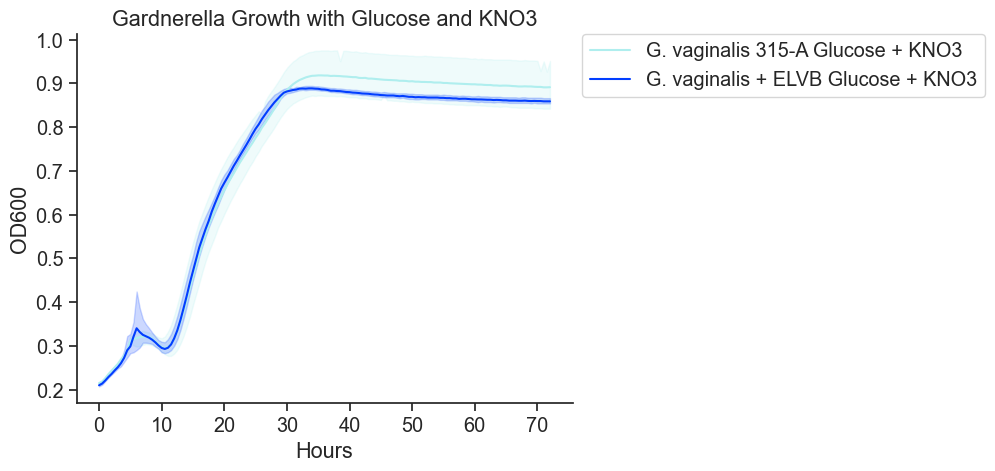

In [18]:
palette = ['paleturquoise', sns.color_palette('bright')[0]]
graphData = sliceDFBy(df121024, ['Strain', 'Treatment'], [['G. vaginalis 315-A', 'G. vaginalis + ELVB'], ['Glucose + KNO3']])
plot = sns.lineplot(data=graphData, x='Hours', y='OD600', hue='Label', palette=palette)
plot.set(title='Gardnerella Growth with Glucose and KNO3')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()

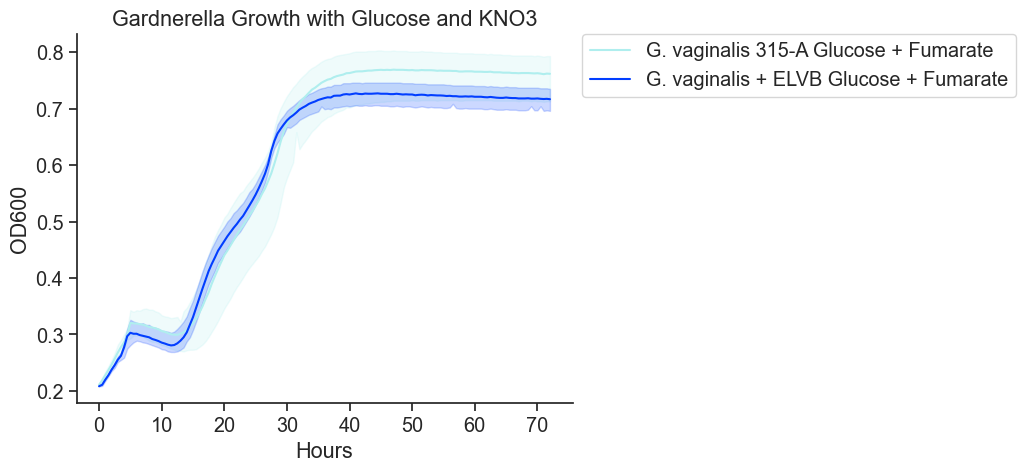

In [17]:
palette = ['paleturquoise', sns.color_palette('bright')[0]]
graphData = sliceDFBy(df121024, ['Strain', 'Treatment'], [['G. vaginalis 315-A', 'G. vaginalis + ELVB'], ['Glucose + Fumarate']])
plot = sns.lineplot(data=graphData, x='Hours', y='OD600', hue='Label', palette=palette)
plot.set(title='Gardnerella Growth with Glucose and KNO3')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()

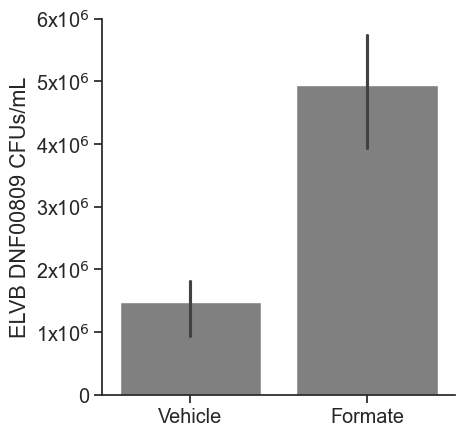

In [29]:
# Graph CFU counting data of DNF00809 cultured for 72hrs in media + or - 20.83mM formate
dataToGraph = pd.read_csv(analysisPath.joinpath('12-18-24_cfu_counting.csv'))
plot = sns.catplot(data=dataToGraph, x='Treatment', y='CFUs/mL', kind='bar', color='gray', aspect=0.9)
plot.set(ylim=(0, 6e6), ylabel='ELVB DNF00809 CFUs/mL', xlabel='')
plot.set_yticklabels([0, r'1x10$^{6}$', r'2x10$^{6}$', r'3x10$^{6}$', r'4x10$^{6}$', r'5x10$^{6}$', r'6x10$^{6}$'])

In [41]:
# Graph CFU growth curve experiment of DNF00809 growing in vehicle or formate with ngWC as the base media
data11325 = pd.read_csv(analysisPath.joinpath('1-13-25_DNF809_formate.csv'))

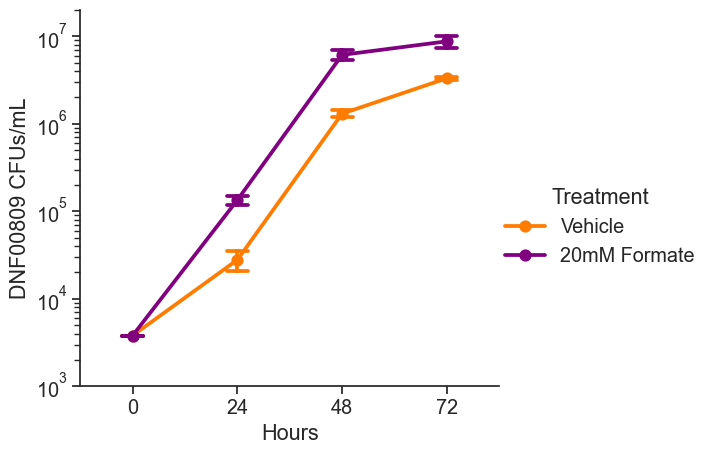

In [42]:
plot = sns.catplot(data=data11325, x='Hours', y='CFUs/mL', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=[sns.color_palette('bright')[1], 'purple'])
plot.set(yscale='log', ylim=(1e3, 2e7), ylabel='DNF00809 CFUs/mL')
plot.savefig(figurePath.joinpath('1-13-25_formate_growth.png'), dpi=300, bbox_inches='tight')

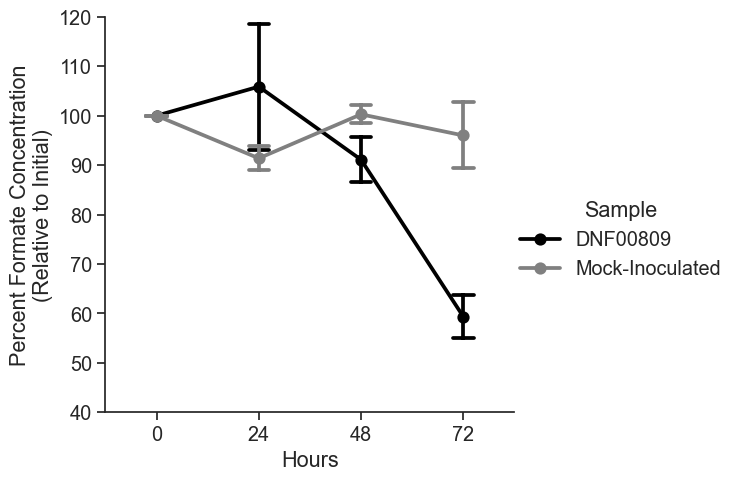

In [22]:
# Graph the changes in formate concentrations for culture and uninoculated samples
formate11325 = pd.read_csv(analysisPath.joinpath('1-13-25_formate_changes.csv'))
plot = sns.catplot(data=formate11325, x='Hours', y='Percent Change (Formate)', hue='Sample', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=['black', 'gray'])
plot.set(ylabel='Percent Formate Concentration\n(Relative to Initial)', ylim=(40, 120))
plot.savefig(figurePath.joinpath('1-13-25_formate_change.png'), dpi=300, bbox_inches='tight')

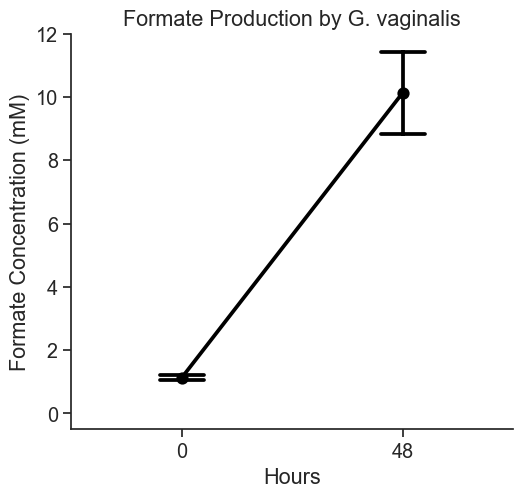

In [18]:
# Graph formate data from the PYG spent media experiment
gardData = pd.read_csv(analysisPath.joinpath('PYG_gardnerella_formate.csv'))
plot = sns.catplot(data=gardData, x='Hours', y='Formate Concentration (mM)', capsize=.2, errorbar='se', kind='point', aspect=1.1, color='black')
plot.set(title='Formate Production by G. vaginalis', ylim=(-0.5, 12))

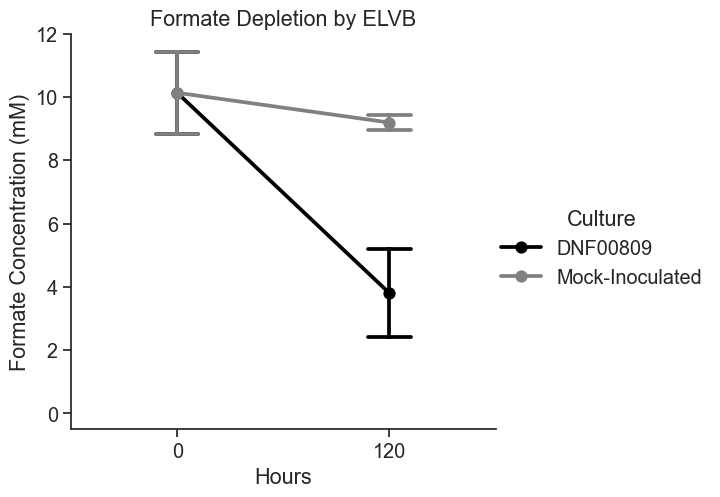

In [20]:
dnf809data = pd.read_csv(analysisPath.joinpath('PYG_dnf809_formate.csv'))
plot = sns.catplot(data=dnf809data, x='Hours', y='Formate Concentration (mM)', hue='Culture', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=['black', 'gray'])
plot.set(title='Formate Depletion by ELVB', ylim=(-0.5, 12))

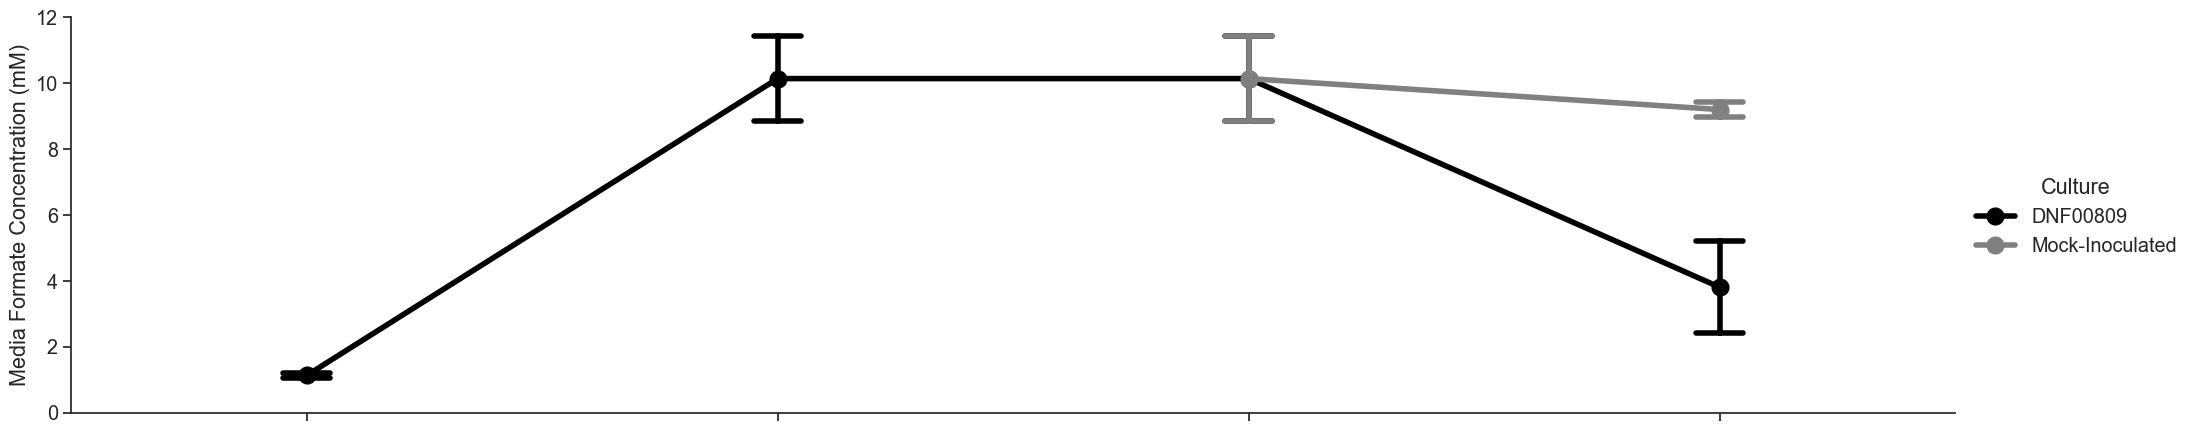

In [32]:
# Try graphing the combined formate assay results
dataCombined = pd.read_csv(analysisPath.joinpath('PYG_formate_combined.csv'))
plot = sns.catplot(data=dataCombined, x='Timepoint', y='Formate (mM)', hue='Culture', capsize=.1, errorbar='se', kind='point', aspect=4, linewidth=4, palette=['black', 'gray'])
plot.set(ylim=(0, 12), xlabel='', ylabel='Media Formate Concentration (mM)')
plot.set_xticklabels([], rotation=30, ha='right')
plot.savefig(figurePath.joinpath('spentmedia_formate_change.png'), dpi=300, bbox_inches='tight')

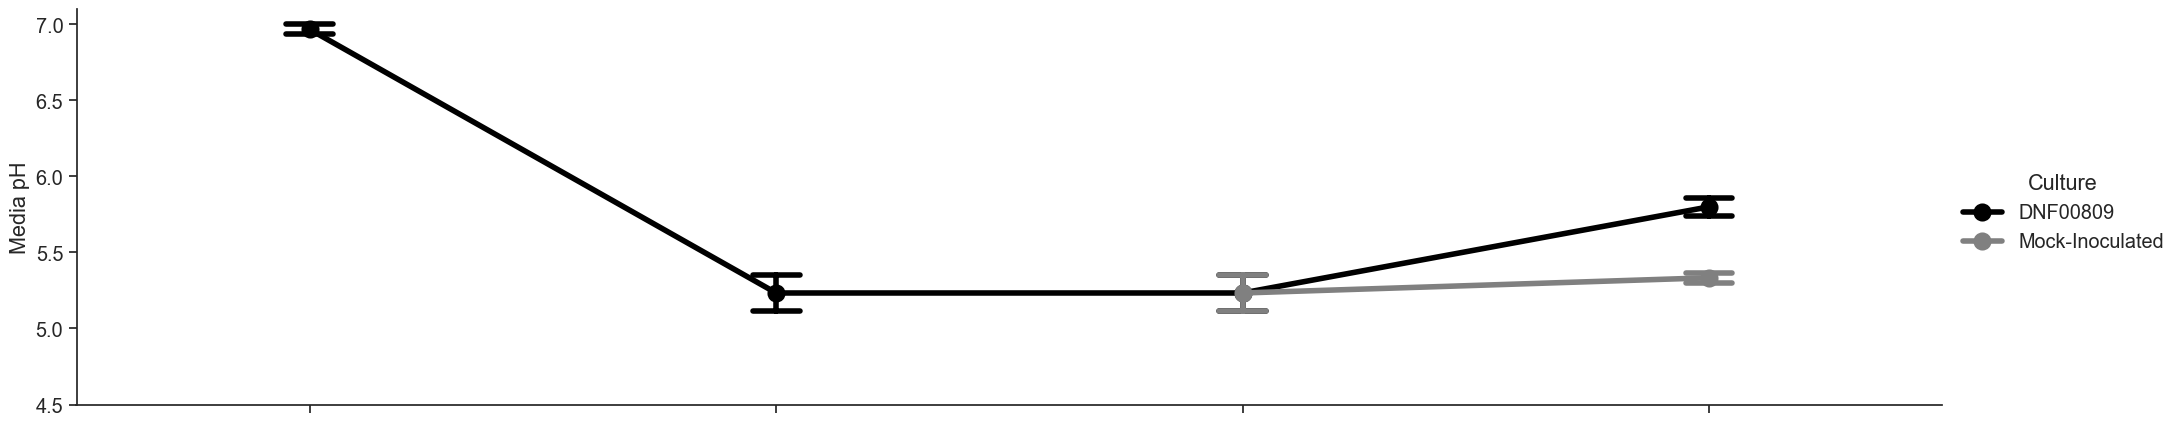

In [31]:
# Graph the pH from the spent media experiment
dataCombined = pd.read_csv(analysisPath.joinpath('PYG_formate_combined.csv'))
plot = sns.catplot(data=dataCombined, x='Timepoint', y='Media pH', hue='Culture', capsize=.1, errorbar='se', kind='point', aspect=4, linewidth=4, palette=['black', 'gray'])
plot.set(ylim=(4.5, 7.1), xlabel='')
plot.set_xticklabels([], rotation=30, ha='right')
plot.savefig(figurePath.joinpath('spentmedia_pH_change.png'), dpi=300, bbox_inches='tight')

In [12]:
# Graph growth curves of G. vaginalis growing in the spent DNF00809 media
data12225 = pd.read_csv(analysisPath.joinpath('1-22-25_Gardnerella_2xspent.csv'))
strainLocs = [
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', '', '', '', '', '', '', ''],
    ['', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '']
]
treatmentLocs = [
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', 'DNF00809 Spent Media', 'DNF00809 Spent Media', 'DNF00809 Spent Media', 'Negative', '', '', '', '', '', '', ''],
    ['', 'Uninoculated Spent Media', 'Uninoculated Spent Media', 'Uninoculated Spent Media', 'Negative', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '']
]
df12225 = curveData2df(data12225, strainLocs, treatmentLocs)
calculateDeltaOD(df12225)

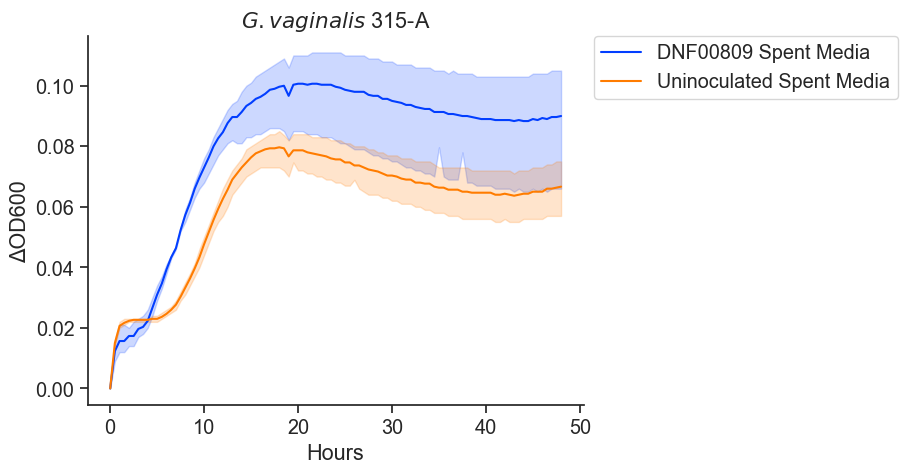

In [13]:
dataToPlot = sliceDFBy(df12225, ['Strain', 'Treatment'], [['G. vaginalis 315-A'], ['DNF00809 Spent Media', 'Uninoculated Spent Media']])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{G. vaginalis}$ 315-A', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('9-13-24_Gvaginalis_ATCC14018.png'))

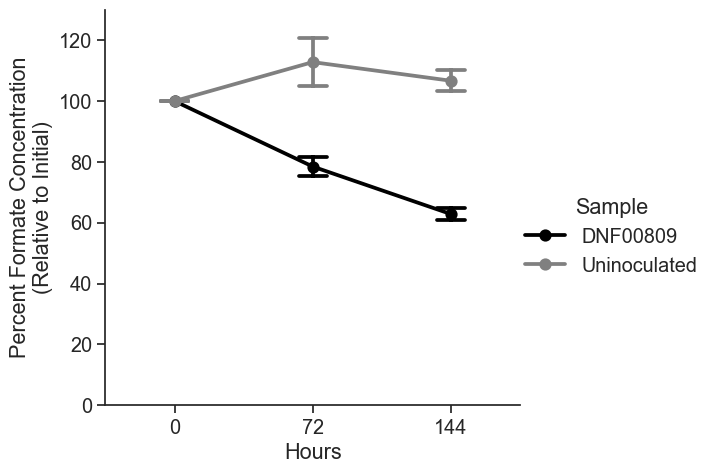

In [15]:
# Graph results from my experiment seeing how much formate DNF00809 depletes over 144hrs
data144 = pd.read_csv(analysisPath.joinpath('144hrs_formate_depletion.csv'))
plot = sns.catplot(data=data144, x='Hours', y='Percent', hue='Sample', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=['black', 'gray'])
plot.set(ylabel='Percent Formate Concentration\n(Relative to Initial)', ylim=(0, 130))
#plot.savefig(figurePath.joinpath('1-20-25_formate_change.png'), dpi=300, bbox_inches='tight')